In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical


2023-07-05 12:45:08.912950: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
dataset_dir = './_data'

train_ratio = 0.8  # 80% for training, 20% for testing
# Lists to store the file paths and labels
file_paths = []
label_ids = []
labels = ['A', 'B', 'C', 'D', 'E', 'Double', 'Exceptions']

In [3]:
import tensorflow as tf

devices = tf.config.list_physical_devices("GPU")

if devices:
  print("TensorFlow is running with your GPU")
else:
  print("TensorFlow is not running with your GPU")

TensorFlow is running with your GPU


2023-07-05 12:45:14.601875: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-05 12:45:14.605274: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-05 12:45:15.219899: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-05 12:45:15.219993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2023-07-05 12:45:15.220114: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-05 12:45:15.284521: I tensorflow/stream_executor/platfor

## Checking if any image is corrupted or not

In [4]:
import os
# Iterate through each class directory
for label_id, label in enumerate(labels):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        file_paths.extend([os.path.join(class_dir, f) for f in image_files])
        label_ids.extend([label_id] * len(image_files))

# Shuffle the file paths and label IDs
tf.random.set_seed(42)
tf.random.shuffle(file_paths)
tf.random.set_seed(42)
tf.random.shuffle(label_ids)

# Split the dataset into training and testing sets using stratified sampling
X_train_paths, X_test_paths, y_train_ids, y_test_ids = train_test_split(file_paths, label_ids, train_size=train_ratio, stratify=label_ids)

# Convert the image data into NumPy arrays
X_train = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_train_paths])
X_test = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_test_paths])

# Normalizing and performing one-hot encoding
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

# Convert the label IDs into one-hot encoded vectors
y_train = to_categorical(y_train_ids, num_classes=len(labels))
y_test = to_categorical(y_test_ids, num_classes=len(labels))

num_classes = y_test.shape[1]
num_classes

2023-07-05 12:45:15.808223: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 12:45:15.811893: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-05 12:45:15.812153: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-05 12:45:15.812187: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104

7

In [5]:
print("Training set", X_train.shape)
print("Testing set", X_test.shape)

Training set (12421, 130, 20, 3)
Testing set (3106, 130, 20, 3)


In [6]:
'./_data/Exceptions/Question2-scan0047.jpg' in X_train_paths

True

In [7]:
import keras

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(130,20,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 130, 20, 32)       896       
_________________________________________________________________
dropout (Dropout)            (None, 130, 20, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 130, 20, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 10, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 65, 10, 64)        3

In [9]:
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 11))

In [10]:
hist = model.fit(X_train, y_train , epochs=11, validation_split=0.1, callbacks=[lr_scheduler])

2023-07-05 12:45:35.134641: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 348753600 exceeds 10% of free system memory.
2023-07-05 12:45:35.373188: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-05 12:45:35.374372: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2495995000 Hz


Epoch 1/12


2023-07-05 12:45:36.612401: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-05 12:45:37.132947: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


350/350 [==============================] - 48s 113ms/step - loss: 1.7699 - accuracy: 0.3533 - val_loss: 1.2275 - val_accuracy: 0.5800
Epoch 2/12
350/350 [==============================] - 34s 97ms/step - loss: 0.9321 - accuracy: 0.6068 - val_loss: 0.6417 - val_accuracy: 0.7755
Epoch 3/12
350/350 [==============================] - 35s 99ms/step - loss: 0.5718 - accuracy: 0.7895 - val_loss: 0.4965 - val_accuracy: 0.8359
Epoch 4/12
350/350 [==============================] - 34s 98ms/step - loss: 0.4347 - accuracy: 0.8505 - val_loss: 0.4328 - val_accuracy: 0.8479
Epoch 5/12
350/350 [==============================] - 36s 102ms/step - loss: 0.3612 - accuracy: 0.8771 - val_loss: 0.4000 - val_accuracy: 0.8632
Epoch 6/12
350/350 [==============================] - 34s 96ms/step - loss: 0.3098 - accuracy: 0.8993 - val_loss: 0.2863 - val_accuracy: 0.9163
Epoch 7/12
350/350 [==============================] - 35s 100ms/step - loss: 0.2697 - accuracy: 0.9141 - val_loss: 0.2836 - val_accuracy: 0.9220


## Save Model

In [42]:
models_path = "./saved_models"

os.makedirs(models_path, exist_ok=True)

# get the number of files in the directory
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

# save the model with the current number
num_files = get_num_files(models_path)

model.save(os.path.join(models_path, f"model_{num_files}.h5"))

/tmp/ipykernel_174165/3113396048.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


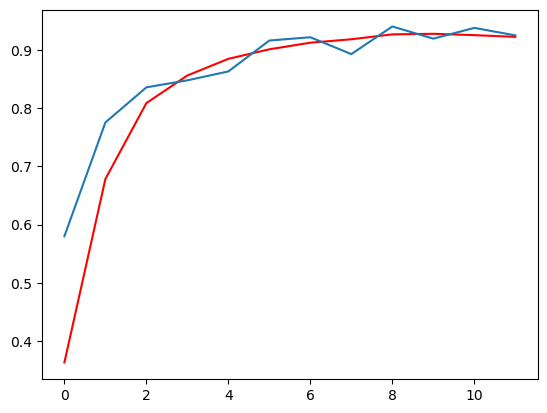

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

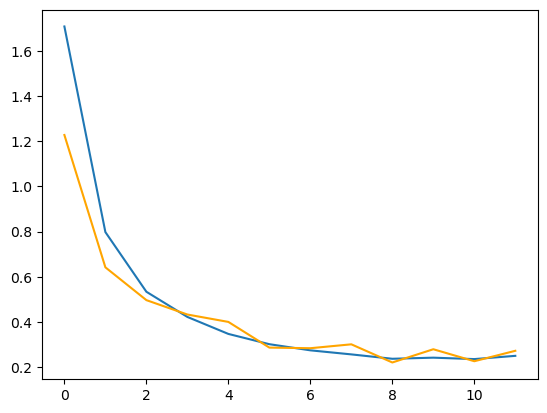

In [13]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [14]:
predictions_original = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions_original)

In [15]:
y_test_argmax = tf.argmax(y_test, axis=1)


In [16]:
rounded_predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
prediction_index_probs: dict[int, list] = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: []
}

low_prob_indices = []
low_prob_predictions = []

for i, prediction in enumerate(predictions_original):
    prediction_index = np.argmax(prediction)
    prediction_prob = prediction[prediction_index]
    if prediction_prob < 0.8:
        low_prob_indices.append(i)
        low_prob_predictions.append(prediction)
    prediction_index_probs[prediction_index].append(prediction_prob)
    # print(prediction_index_probs)

for key in prediction_index_probs.keys():
    print(f"average {key}", np.argmin(prediction_index_probs[key]))    


average 0 331
average 1 236
average 2 391
average 3 64
average 4 349
average 5 905
average 6 50


In [36]:
print(f"{len(low_prob_indices)} out of {len(X_test)}")
print(f"percentage: {len(low_prob_indices)/len(X_test)}")

508 out of 3106
percentage: 0.16355441081777206


In [19]:
X_test_paths[1907]

'./_data/D/Question67-scan0022.jpg'

In [20]:
predictions_original[11]

array([9.996182e-01, 8.168037e-08, 1.617764e-10, 1.429614e-11,
       4.596598e-10, 3.816797e-04, 8.186421e-09], dtype=float32)

In [21]:
predictions = tf.argmax(rounded_predictions, axis=1)

In [22]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

In [23]:
cm.numpy()

array([[9.81723238e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.04438642e-02, 7.83289817e-03],
       [1.10192837e-02, 9.50413223e-01, 5.50964187e-03, 8.26446281e-03,
        0.00000000e+00, 8.26446281e-03, 1.65289256e-02],
       [5.02512563e-03, 2.51256281e-03, 9.62311558e-01, 5.02512563e-03,
        0.00000000e+00, 2.51256281e-02, 0.00000000e+00],
       [2.36220472e-02, 0.00000000e+00, 0.00000000e+00, 9.47506562e-01,
        5.24934383e-03, 1.83727034e-02, 5.24934383e-03],
       [1.81347150e-02, 0.00000000e+00, 2.59067358e-03, 1.03626943e-02,
        9.66321244e-01, 0.00000000e+00, 2.59067358e-03],
       [2.91438980e-02, 2.55009107e-02, 3.00546448e-02, 2.27686703e-02,
        2.55009107e-02, 8.66120219e-01, 9.10746812e-04],
       [7.21649485e-02, 1.03092784e-02, 0.00000000e+00, 0.00000000e+00,
        6.18556701e-02, 0.00000000e+00, 8.55670103e-01]])

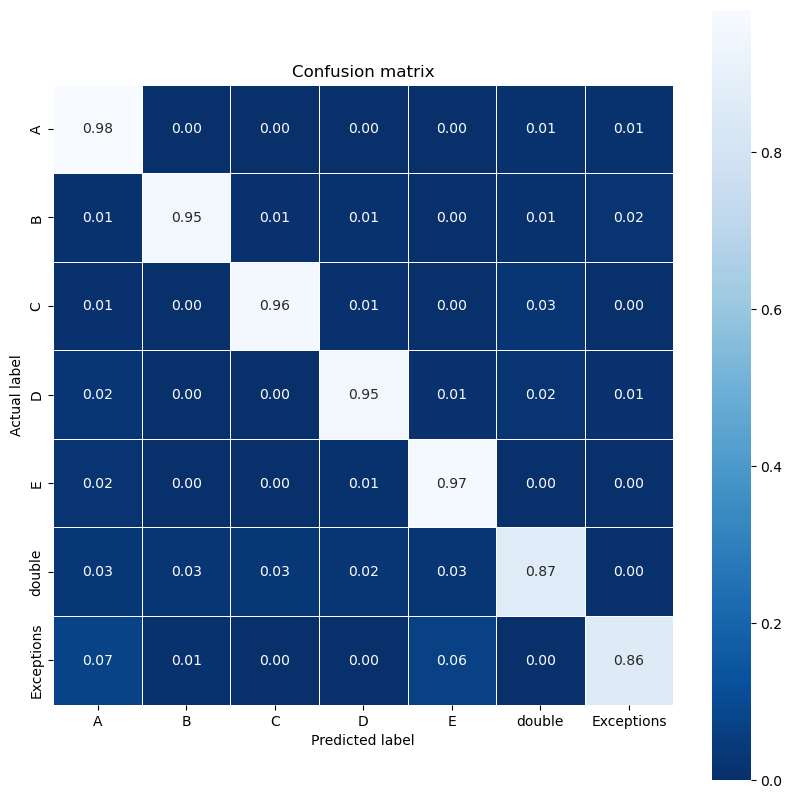

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Accuracy, Recall, BinaryAccuracy

labels = y_test

precision = Precision()
accuracy = Accuracy()
recall = Recall()

In [26]:
# Evaluate the metrics
precision.update_state(labels, rounded_predictions)
accuracy.update_state(labels, rounded_predictions)
recall.update_state(labels, rounded_predictions)

# Print the metrics
print('Precision:', precision.result().numpy())
print('Accuracy:', accuracy.result().numpy())
print('Recall:', recall.result().numpy())

Precision: 0.93333334
Accuracy: 0.97971666
Recall: 0.924018


In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.85%


In [44]:
import cv2

# a = cv2.imread(dataset_dir + '/double/Question1-scan0048.jpg')
# getting all the files in a dir
count = 0
ltf = 0
for image_name in os.listdir("./_data/double"):
    image_path = os.path.join("./_data/double", image_name)
    a = cv2.imread(image_path)
    resize = tf.image.resize(a, (130, 20))
    b = model.predict(np.expand_dims(resize/255, 0))
    c = np.apply_along_axis(lambda x: np.max(x), 1, b)
    if tf.argmax(b[0]).numpy() != 5:
        ltf += 1
        print(image_name, c, tf.argmax(b[0]).numpy())
    
    count += 1
    if count > 1000:
        break
    
print(ltf)
# plt.imshow(a)
    # e = np.apply_along_axis(lambda x: np.round(x), 1, b)

Question196-scan0033b.jpg [0.7274751] 4
Question4-scan0052b.jpg [0.969681] 2
Question196-scan0040b.jpg [0.85233104] 0
Question17-scan0035b.jpg [0.8256274] 2
Question62-scan0016b.jpg [0.97831947] 4
Question59-scan0023b.jpg [0.71119756] 0
Question8-scan0051b.jpg [0.97779226] 2
Question82-scan0012b.jpg [0.95314413] 2
Question90-scan0011b.jpg [0.95803356] 3
Question90-scan0020b.jpg [0.7333206] 2
Question195-scan0016b.jpg [0.7360808] 3
Question86-scan0003b.jpg [0.6392831] 2
Question113-scan0003b.jpg [0.9846177] 1
Question197-scan0030b.jpg [0.6694107] 2
Question82-scan0032b.jpg [0.93084925] 4
Question81-scan0023b.jpg [0.81156117] 1
Question105-scan0008b.jpg [0.8578713] 4
Question109-scan0029b.jpg [0.38793853] 4
Question26-scan0031b.jpg [0.74272734] 4
Question14-scan0022b.jpg [0.7626017] 1
Question78-scan0025b.jpg [0.9623963] 3
Question92-scan0012b.jpg [0.6389521] 2
Question92-scan0011b.jpg [0.4994143] 3
Question196-scan0006b.jpg [0.57003415] 1
Question33-scan0027b.jpg [0.9998011] 4
Question6

In [40]:
ltf

11

In [82]:
import cv2
import numpy as np
model = tf.keras.models.load_model('saved_models/model_2.h5')

img = cv2.imread('./output_folder/Question88.jpg')
resize = tf.image.resize(img, [130, 20])
predictions = model.predict(np.expand_dims(resize/255, axis=0))

# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

In [83]:
predictions

array([[0.04205149, 0.02469086, 0.01523522, 0.01687624, 0.01013163,
        0.01958996, 0.8714246 ]], dtype=float32)

In [84]:
pred = np.apply_along_axis(lambda x: np.round(x), 1, predictions)

In [85]:
predictions

array([[0.04205149, 0.02469086, 0.01523522, 0.01687624, 0.01013163,
        0.01958996, 0.8714246 ]], dtype=float32)

In [86]:
shading= {
    0: 'A',
    1: 'B',
    2: 'C', 
    3: 'D', 
    4: 'E',
    5: 'Double',
    6: 'Exception'
}
for i in range(len(pred)):
    for j in range(len(pred[i])):
        if pred[i][j] == 1:
            print(shading[j], end=' ')

Exception 